<a href="https://colab.research.google.com/github/tegacodess/My-Data-Projects/blob/main/Predict_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict House Price

In this task, I aim to predict house prices based on other data. It would be completed using a Regression model because the prediction to be made consists of numeric and continuous values. The specific model used is Linear Regression, which helps estimate the relationship between the input features and the predicted price.

This project is part of an assignment from the Data Science Learning Program (Cohort 8), organized by Axia Africa.  

### ☑ Objectives:
* Data understanding employing visualization methods
* Data preparation & preprocessing
* Train Model
* Make predictions
* Evaluate model using regression metrics


### ☝ Tools Used
1. Matplotlib Library
2. Seaborn Library
3. Numpy Library
4. Pandas Library

In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/DGideonnene/Axia_Assign_1/main/Housing.csv')

## Data Understanding

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# check for null values
dataset.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# check for duplicates
dataset.duplicated().sum()

np.int64(0)

In [ ]:
# overview of numerical data using descriptive stats
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
# split columns into numeric and categorical columns
num_cols = dataset.select_dtypes(include=np.number). columns.tolist()
cat_cols = dataset.select_dtypes(include='object').columns.tolist()

#### Data visualization for a better understanding

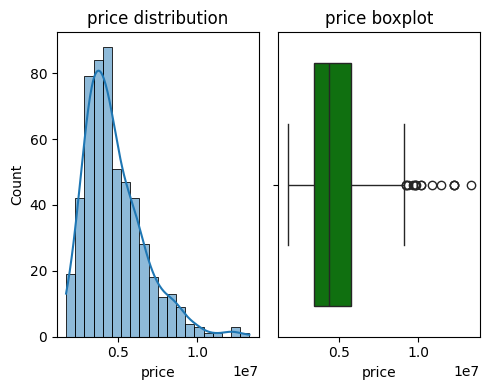

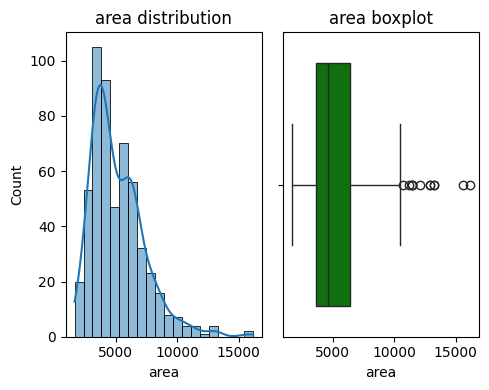

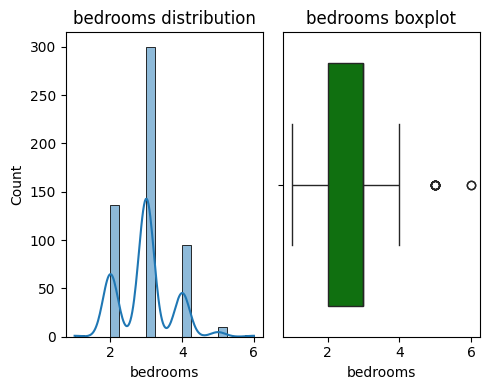

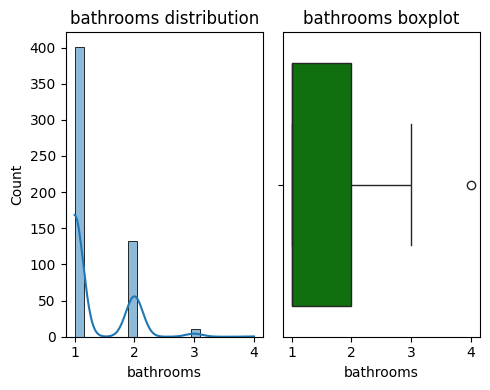

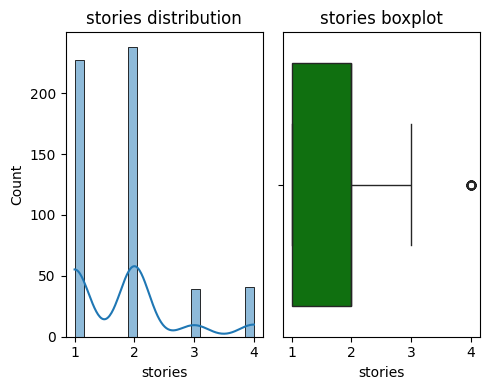

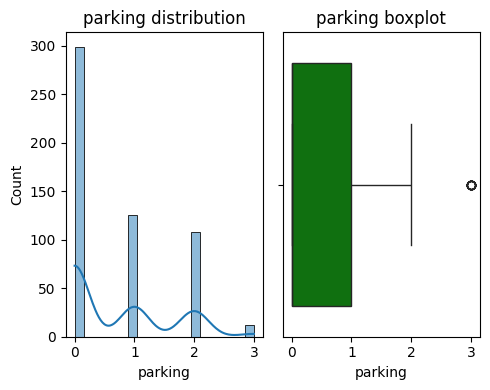

In [ ]:
# Numerical columns
for num in num_cols:
  # visualization using a histogram
  plt.figure(figsize=(5,4))
  plt.subplot(1,2,1)
  sns.histplot(dataset[num], kde = True, bins=20)
  plt.title(f'{num} distribution')
  plt.xlabel(num)
  plt.ylabel('Count')

  # Visualization using a boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x = dataset[num], color='green')
  plt.title(f'{num} boxplot')
  plt.xlabel(num)
  plt.tight_layout()
  plt.show()


From the visuals above, it is observed that the *price* and *area* columns have right skewed data and contain outliers. This would affect model prediction negatively. To resolve this problem, I would perform data transformation on the *price* and *area* columns.  



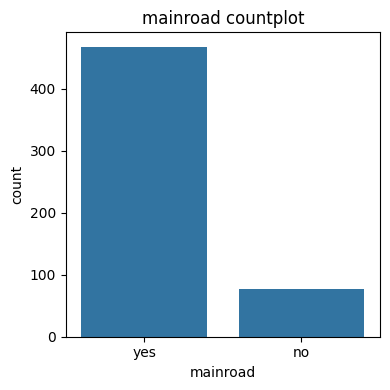

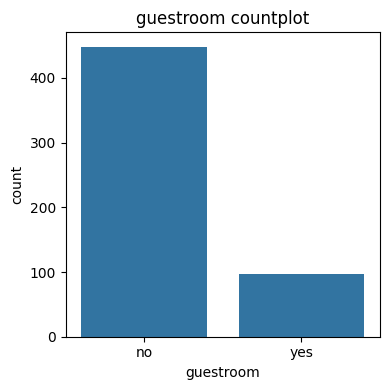

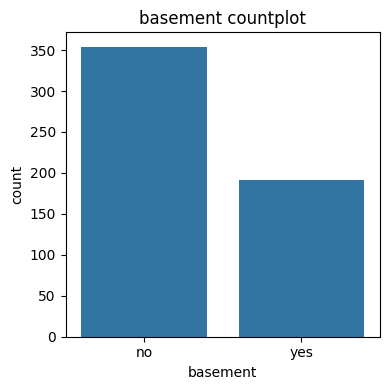

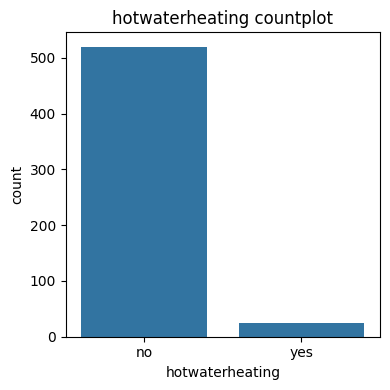

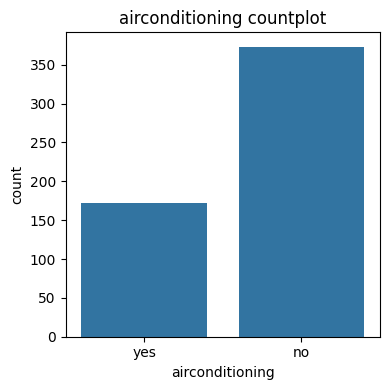

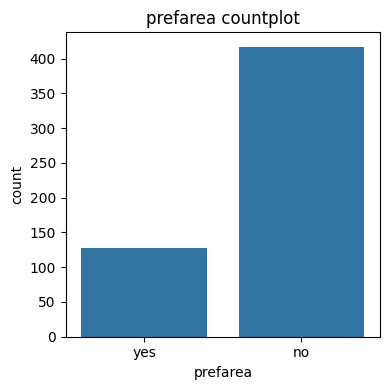

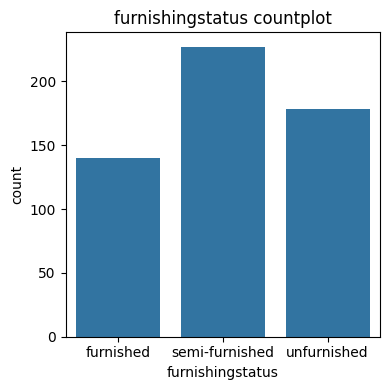

In [ ]:
# Visualization of the categorical columns
for i in cat_cols:
  plt.figure(figsize = (4,4))
  sns.countplot(x= i, data = dataset)
  plt.title(f'{i} countplot')
  plt.tight_layout()
  plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Numerical Columns')

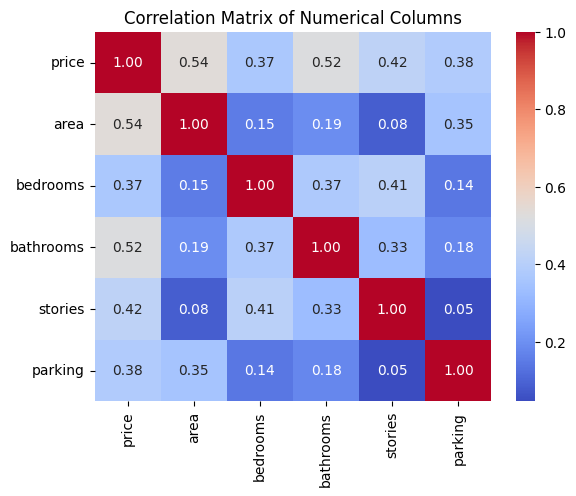

In [ ]:
# Correlation matrix to visualize the relationship between columns.
corr_matrix = dataset[num_cols].corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')

## Data Preparation

#### Data Transformation + Feature Engineering
There are different transformation techniques. Some examples are scaling, encoding, log transformation, etc.
Log transformation would be used in this case to reduce the right skewness of the *area* and *price* columns.

In [ ]:
dataset['log price'] = np.log(dataset['price'])
dataset['log area'] = np.log(dataset['area'])

Seperation of columns into feature and target data. This would be used to train and make predictions with the model.
* Features: input labelled data the model will base its prediction on
* Target: output data the model is to predict

In [ ]:
features = dataset.drop(columns = ['price', 'log price', 'area'])
# area and price columns were dropped because they have been transformmed into the log price and log area columns.
target = dataset['log price']

In [ ]:
# import necessary libraries to prepare data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
training_data, testing_data, training_target, testing_target = train_test_split(features, target, test_size = 0.2, random_state = 54)

In [ ]:
# One hot encoding on categorical features
encoder = OneHotEncoder()

In [ ]:
train_cat = encoder.fit_transform(training_data[cat_cols])
test_cat = encoder.transform(testing_data[cat_cols])

In [ ]:
'''
The onehotencoder converts the categorical data into a sparse matrix.
And because this encoded data would be combined with the numerical scaled columns that are arrays, it would need to be converted to an array.
'''
train_cat=train_cat.toarray()
test_cat = test_cat.toarray()

In [ ]:
# Scaling numerical features
scaler = StandardScaler()

In [ ]:
num_cols = [ 'bedrooms', 'bathrooms', 'stories', 'parking', 'log area']
train_num = scaler.fit_transform(training_data[num_cols])
test_num = scaler.transform(testing_data[num_cols])

In [ ]:
# combine encoded features with scaled features
processed_train_data = np.hstack((train_num, train_cat))
processed_test_data = np.hstack((test_num, test_cat))

## Train Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(processed_train_data, training_target)
model.fit(processed_test_data, testing_target)

LinearRegression()

In [ ]:
# Make predictions
predict_train = model.predict(processed_train_data)
predict_test = model.predict(processed_test_data)

### Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Evaluate the train prediction
mae = round(mean_absolute_error(training_target, predict_train), 2)
mse = round(mean_squared_error(training_target, predict_train),2)
r2_score_ = round(r2_score(training_target, predict_train),2)

train_eval = {
    "Mean Absolute Error": mae,
    "Mean Square Error": mse,
    "R\u00b2 Score": r2_score_
}

train_eval

{'Mean Absolute Error': 0.17, 'Mean Square Error': 0.05, 'R² Score': 0.66}

In [ ]:
# Evaluate the test prediction
mae = round(mean_absolute_error(testing_target, predict_test),2)
mse = round(mean_squared_error(testing_target, predict_test),2)
r2_score_ = round(r2_score(testing_target, predict_test),2)

test_eval = {
     "Mean Absolute Error": mae,
    "Mean Square Error": mse,
    "R\u00b2 Score": r2_score_
}

test_eval

{'Mean Absolute Error': 0.12, 'Mean Square Error': 0.03, 'R² Score': 0.79}

In [ ]:
# Convert evaluation to a data frame
tr_eval = pd.DataFrame(train_eval, index=[0])
te_eval = pd.DataFrame(test_eval, index=[1])

combined = pd.concat([tr_eval, te_eval])
combined

,Mean Absolute Error,Mean Square Error,R² Score
0,0.17,0.05,0.66
1,0.12,0.03,0.79


**My Evaluation**

The mean absolute error is lower on the test set than on the training dataset meaning the models prediction are closer to the actual values.
The $r^2$ score, which measures how well a model predicts an outcome, is also higher on the test dataset than the trainig dataset.

Overall, the model performs beautifully on the test dataset compared to the training dataset showing how well it generalized.

## ✅ Conclusion

In this project, the Linear Regression model was used to predict house prices based on different features.
The data was prepared using data preprocessing methods like encoding and scaling, and transformed.  Thereafter, the model was trained and evaluated using regression metrics.

The evaluation results showed that the model generalized well. It proved the model to be reliable and accurate for predicting house prices.